# Actividad 4: Transfer Learning

## **Jessica Nicole Copado Leal A01637876**

You will use the Cat and Dog Dataset

Goal: Build 3 different convolutional models using the same dataset. Choose 3 differents models from TF's module tf.keras.applications

Models:

* MobileNet
* MobileNetV2
* ResNet-50

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense

from keras.applications import MobileNet, MobileNetV2, ResNet50
from keras.applications.mobilenet import preprocess_input

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

from keras.utils import to_categorical
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

import cv2

import os

### MobileNet

In [ ]:
classes = ["cats", "dogs"]

EPOCHS                  = 3
IMGSIZE                 = 244
BATCH_SIZE              = 32
STOPPING_PATIENCE       = 5
VERBOSE                 = 1
MODEL_NAME              = 'MobileNet_10epochs_imgsize244.h5'
OPTIMIZER               = 'adam'
TRAINING_DIR            = '/content/drive/MyDrive/IA/IA2/train'
TEST_DIR                = '/content/drive/MyDrive/IA/IA2/test'

os.makedirs(TRAINING_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

training_set = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                 target_size = (IMGSIZE, IMGSIZE), 
                                                 classes=classes,
                                                 batch_size = BATCH_SIZE, 
                                                 class_mode = 'binary', 
                                                )

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(TEST_DIR, 
                                            target_size = (IMGSIZE, IMGSIZE), 
                                            batch_size = BATCH_SIZE, 
                                            class_mode = 'binary'
                                           )

Found 2000 images belonging to 2 classes.
Found 1030 images belonging to 2 classes.


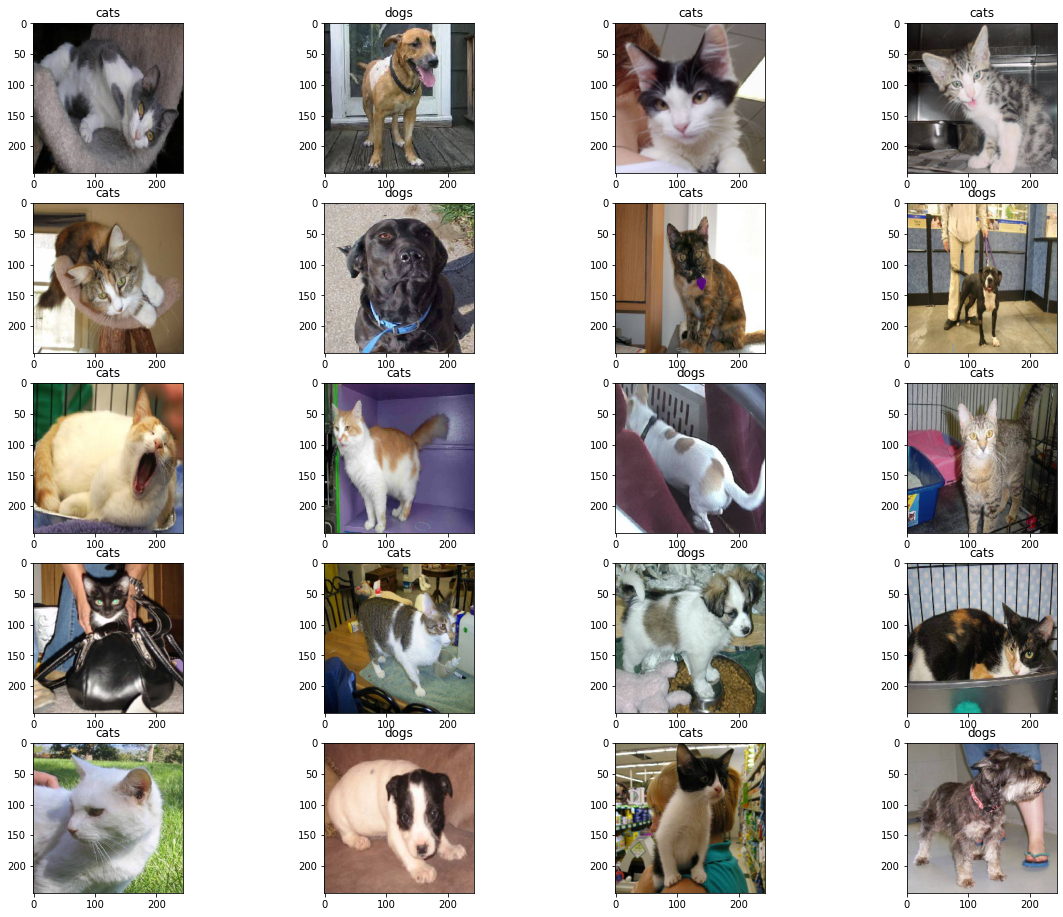

In [ ]:
j = np.random.randint(BATCH_SIZE)
X, y = test_set[j]

fig, ax = plt.subplots(5, 4, figsize=(20, 16))

for i, axis in enumerate(ax.flat):
    axis.imshow(X[i])
    cat = classes[int(y[i])]
    axis.set(title=cat)

In [ ]:
mobilenet = MobileNet(input_shape=(244, 244, 3) ,weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
inputs = Input(shape=(IMGSIZE, IMGSIZE, 3))

# define the full network
x = mobilenet(inputs)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)

# output layer
outputs = Dense(1, activation='sigmoid')(x)

# set the model
modelm = Model(inputs=inputs, outputs=outputs)

# freeze base-model (mobilenet) weights
modelm.layers[1].trainable = False

modelm.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

# model summary
modelm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328

In [ ]:
history = modelm.fit_generator(training_set, 
                              epochs=EPOCHS, 
                              validation_data = test_set, 
                             )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/3
63/63 [==============================] - 663s 10s/step - loss: 0.1517 - accuracy: 0.9400 - val_loss: 0.0477 - val_accuracy: 0.9806
Epoch 2/3
63/63 [==============================] - 141s 2s/step - loss: 0.0783 - accuracy: 0.9725 - val_loss: 0.0695 - val_accuracy: 0.9748
Epoch 3/3
63/63 [==============================] - 127s 2s/step - loss: 0.0516 - accuracy: 0.9810 - val_loss: 0.0372 - val_accuracy: 0.9864


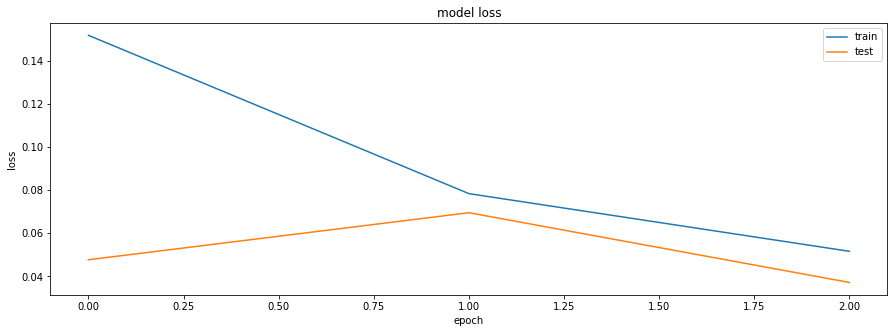

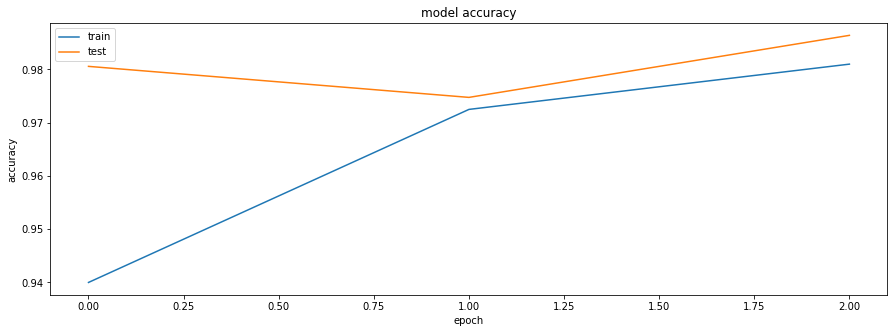

In [ ]:
# summarize history for loss
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for accuracy
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### MobileNetV2

In [ ]:
mnet = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, 
                                                      input_shape=(128, 128, 3),
                                                      pooling='avg',
                                                      weights='imagenet')

mnet.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        mnet,
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])


    model.layers[0].trainable = False
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model


model_mob = create_model()
model_mob.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
%%time

history_2 = model_mob.fit_generator(training_set, 
                            epochs=EPOCHS, 
                            validation_data = test_set,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/3
63/63 [==============================] - 121s 2s/step - loss: 0.4221 - acc: 0.8200 - val_loss: 0.2530 - val_acc: 0.9107
Epoch 2/3
63/63 [==============================] - 112s 2s/step - loss: 0.2004 - acc: 0.9435 - val_loss: 0.1904 - val_acc: 0.9301
Epoch 3/3
63/63 [==============================] - 116s 2s/step - loss: 0.1526 - acc: 0.9530 - val_loss: 0.1539 - val_acc: 0.9466
CPU times: user 10min 9s, sys: 16.3 s, total: 10min 25s
Wall time: 7min 9s


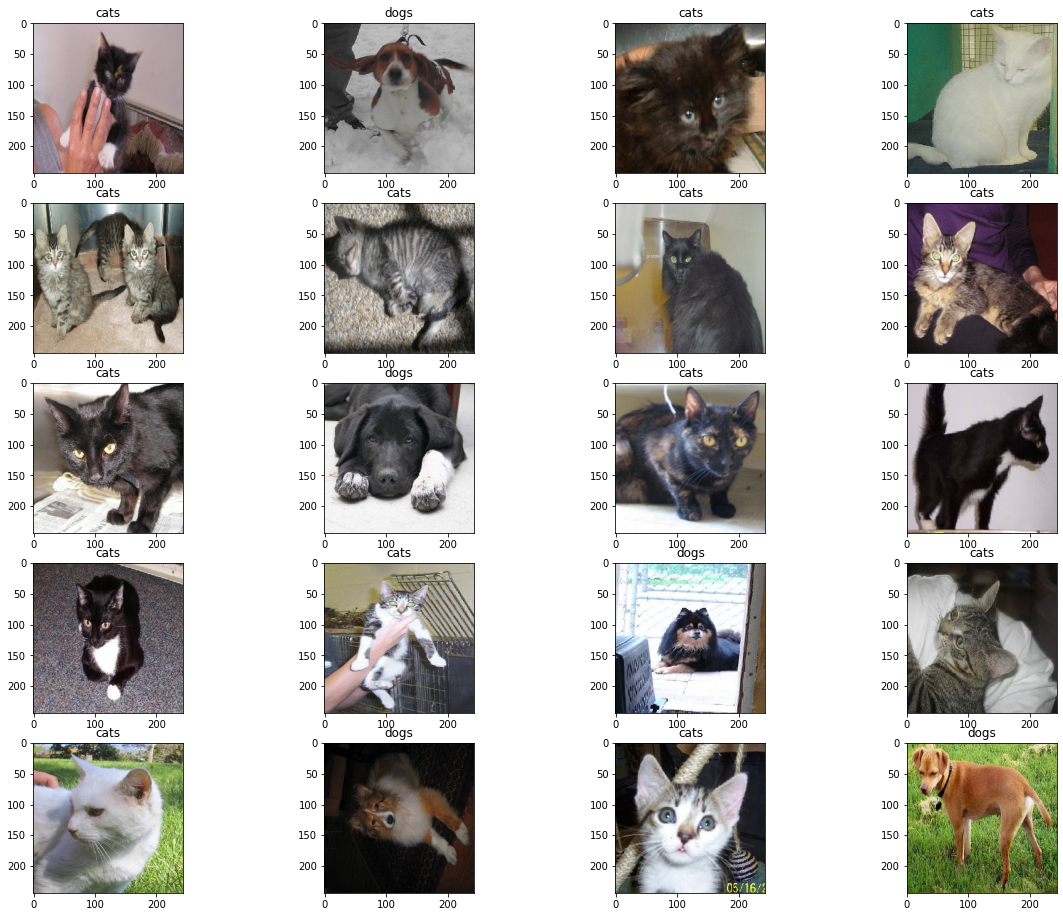

In [ ]:
j = np.random.randint(BATCH_SIZE)
X, y = test_set[j]

fig, ax = plt.subplots(5, 4, figsize=(20, 16))

for i, axis in enumerate(ax.flat):
    axis.imshow(X[i])
    cat = classes[int(y[i])]
    axis.set(title=cat)

### ResNet-50

In [ ]:
model_res = Sequential()
model_res.add(ResNet50(include_top=False, pooling='max'))
model_res.add(Dense(2, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model_res.layers[0].trainable = True

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model_res.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_res.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_4 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
train_model = model_res.fit(training_set, 
                              epochs=EPOCHS,
                              shuffle=True, 
                              verbose=True)

Epoch 1/3
63/63 [==============================] - 1760s 28s/step - loss: 13.4911 - accuracy: 0.5420
Epoch 2/3
63/63 [==============================] - 1846s 29s/step - loss: 1.2284 - accuracy: 0.5755
Epoch 3/3
63/63 [==============================] - 1815s 29s/step - loss: 0.9916 - accuracy: 0.6090


In [ ]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(train_model)

KeyError: ignored

### Conclusions

* Report the accuracy for each model.  Which was the highest?
The highest accuracy was for the MobileNet.

* Report the training and validation loss. Which was the lowest? Why?
The lowest was MobileNet, it had the lowest loss because of its accuracy.

* Make a conclusion about the task you have done.
By making 3 different convolutional models, we can observe different accuracies for the same dataset. We can conclude that it all depends on the layers put in the models.